# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import missingno as msno
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

In [ ]:
import pandas as pd
import numpy as np
import re
from re import sub
import multiprocessing
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

import gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
from gensim.utils import tokenize

from sklearn import preprocessing
from sklearn.cluster import KMeans

import tensorflow as tf

from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM, GRU
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint

from time import time 
from collections import defaultdict

import keras
from keras import models
from keras import layers
from keras import Input
from keras import activations
from keras.constraints import maxnorm
from keras.optimizers import Adam
from keras.applications import VGG16
from tensorflow.keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost import plot_importance

from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Loading

In [ ]:
data=pd.read_csv("/content/drive/My Drive/stage/ML_jobs.csv")

In [ ]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Machine Learning Engineer,$43K-$85K (Glassdoor est.),POSITION PURPOSE:\nThis position is responsibl...,3.8,America First Credit Union\n3.8,"Ogden, UT","Ogden, UT",1001 to 5000 employees,1939,Nonprofit Organization,Investment Banking & Asset Management,Finance,$100 to $500 million (USD),"Zions Bancorporation, Mountain America Credit ..."
1,Aviation Data Scientist and Machine Learning E...,$43K-$85K (Glassdoor est.),Why choose between doing meaningful work and h...,3.3,MITRE\n3.3,"McLean, VA","Bedford, MA",5001 to 10000 employees,1958,Nonprofit Organization,Federal Agencies,Government,$1 to $2 billion (USD),"Battelle, General Atomics, SAIC"
2,AI/ML Engineer,$43K-$85K (Glassdoor est.),Why choose between doing meaningful work and h...,3.3,MITRE\n3.3,"McLean, VA","Bedford, MA",5001 to 10000 employees,1958,Nonprofit Organization,Federal Agencies,Government,$1 to $2 billion (USD),"Battelle, General Atomics, SAIC"
3,Perception Engineer,$43K-$85K (Glassdoor est.),Kodiak Robotics is not just a software company...,4.7,Kodiak Robotics\n4.7,"Mountain View, CA","Mountain View, CA",51 to 200 employees,2018,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
4,Senior Research Engineer - Biological Imaging ...,$43K-$85K (Glassdoor est.),"Sony Corporation of America, located in New Yo...",3.9,Sony Electronics\n3.9,"San Jose, CA","San Diego, CA",10000+ employees,1946,Subsidiary or Business Segment,Consumer Products Manufacturing,Manufacturing,$2 to $5 billion (USD),"Samsung Electronics America, Apple, Panasonic,..."


# Data Preprocessing

this for loop changes the salary estimate, the size and the revenue from sentences to numbers. And fixes an issue with the Company name.

In [ ]:
 def preprocess(data_eng) :
  for i in range(len(data_eng)) :
    data_eng["Size"][i]=re.sub("\D+"," ",data_eng["Size"][i])
    data_eng["Size"][i]=data_eng["Size"][i].split(" ")
    data_eng["Size"][i].remove("")
    if data_eng["Size"][i]==[""] :
      data_eng["Size"][i]=-1
    data_eng["Size"][i]=np.array(data_eng["Size"][i]).astype(np.float).mean()/1000
    data_eng["Size"][i]=round(data_eng["Size"][i],2)
    data_eng["Salary Estimate"][i]=re.sub(str(" \\(Glassdoor est.\\)"),"",data_eng["Salary Estimate"][i])
    data_eng["Company Name"][i]=re.sub(str("\n[0-9]\.[0-9]"),"",data_eng["Company Name"][i])
    data_eng["Salary Estimate"][i]=re.sub(str("\$"),"",data_eng["Salary Estimate"][i])
    data_eng["Salary Estimate"][i]=re.sub(str("K"),"",data_eng["Salary Estimate"][i])
    data_eng["Salary Estimate"][i]=re.sub("[a-zA-Z]|\(|\.|\)",'',data_eng["Salary Estimate"][i])
    data_eng["Salary Estimate"][i]=np.array(data_eng["Salary Estimate"][i].split("-")).astype(np.float).mean()
    data_eng["Revenue"][i] = re.sub("to"," ",data_eng["Revenue"][i])
    data_eng["Revenue"][i] = re.sub("\$|\(USD\)|\+|Less than","",data_eng["Revenue"][i])
    if "million" in data_eng["Revenue"][i] and "billion" in data_eng["Revenue"][i] :
      x=data_eng["Revenue"][i].split()
      x[x.index("million")]=""
      x[0:2]=[''.join(x[0:2])]
      x[x.index("billion")]="000"
      x[2:4]=[''.join(x[2:4])]
      data_eng["Revenue"][i]=np.array(x).astype(np.float).mean()
    elif "million" in data_eng["Revenue"][i] :
      data_eng["Revenue"][i] = re.sub("million","",data_eng["Revenue"][i])
      data_eng["Revenue"][i] = np.array(data_eng["Revenue"][i].split()).astype(np.float).mean()
    elif "billion" in data_eng["Revenue"][i] :
      data_eng["Revenue"][i] = re.sub("billion","",data_eng["Revenue"][i])
      data_eng["Revenue"][i] = np.array(data_eng["Revenue"][i].split()).astype(np.float).mean()
      data_eng["Revenue"][i] = data_eng["Revenue"][i]*(10**3)
  return data_eng

In [ ]:
data=preprocess(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Machine Learning Engineer,64,POSITION PURPOSE:\nThis position is responsibl...,3.8,America First Credit Union,"Ogden, UT","Ogden, UT",3,1939,Nonprofit Organization,Investment Banking & Asset Management,Finance,300,"Zions Bancorporation, Mountain America Credit ..."
1,Aviation Data Scientist and Machine Learning E...,64,Why choose between doing meaningful work and h...,3.3,MITRE,"McLean, VA","Bedford, MA",7.5,1958,Nonprofit Organization,Federal Agencies,Government,1500,"Battelle, General Atomics, SAIC"
2,AI/ML Engineer,64,Why choose between doing meaningful work and h...,3.3,MITRE,"McLean, VA","Bedford, MA",7.5,1958,Nonprofit Organization,Federal Agencies,Government,1500,"Battelle, General Atomics, SAIC"
3,Perception Engineer,64,Kodiak Robotics is not just a software company...,4.7,Kodiak Robotics,"Mountain View, CA","Mountain View, CA",0.13,2018,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
4,Senior Research Engineer - Biological Imaging ...,64,"Sony Corporation of America, located in New Yo...",3.9,Sony Electronics,"San Jose, CA","San Diego, CA",10,1946,Subsidiary or Business Segment,Consumer Products Manufacturing,Manufacturing,3500,"Samsung Electronics America, Apple, Panasonic,..."


data informations :

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1000 non-null   object 
 1   Salary Estimate    1000 non-null   object 
 2   Job Description    1000 non-null   object 
 3   Rating             1000 non-null   float64
 4   Company Name       1000 non-null   object 
 5   Location           1000 non-null   object 
 6   Headquarters       1000 non-null   object 
 7   Size               1000 non-null   object 
 8   Founded            1000 non-null   int64  
 9   Type of ownership  1000 non-null   object 
 10  Industry           1000 non-null   object 
 11  Sector             1000 non-null   object 
 12  Revenue            1000 non-null   object 
 13  Competitors        1000 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 109.5+ KB


# Importing two other data and applying the same data preprocessing

In [ ]:
data_science=pd.read_csv("/content/drive/My Drive/stage/Data_scientist_jobs.csv")

In [ ]:
data_science.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,"Data Scientist - Statistics, Early Career",$68K-$111K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310918\n\n...,3.8,Pacific Northwest National Laboratory\n3.8,"Seattle, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
1,Senior Research Statistician- Data Scientist,$68K-$111K (Glassdoor est.),Acuity is seeking a Senior Research Statistici...,4.8,Acuity Insurance\n4.8,"Sheboygan, WI","Sheboygan, WI",1001 to 5000 employees,1925,Company - Private,Insurance Carriers,Insurance,$1 to $2 billion (USD),-1
2,Scientist,$68K-$111K (Glassdoor est.),"Join us as we Rise to the Challenge\nAt KCI, w...",3.6,KCI Technologies\n3.6,"Sparks, MD","Glencoe, MD",1001 to 5000 employees,1988,Company - Private,Architectural & Engineering Services,Business Services,$100 to $500 million (USD),-1
3,R&D Scientist,$68K-$111K (Glassdoor est.),"Since 2001, Hygiena has been on a mission to b...",3.9,Hygiena\n3.9,"New Castle, DE","Camarillo, CA",201 to 500 employees,-1,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$100 to $500 million (USD),"Ecolab, Eurofin Private Investment Office"
4,Scientist: Mammalian Cell Line Development- 3+...,$68K-$111K (Glassdoor est.),ABOUT CELLTHEON:\n\nLocated in the SF Bay Area...,4.0,Celltheon\n4.0,"San Francisco, CA","Union City, CA",1 to 50 employees,-1,Company - Private,-1,-1,Less than $1 million (USD),-1


In [ ]:
data_science=preprocess(data_science)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
data_science.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,"Data Scientist - Statistics, Early Career",89.5,*Organization and Job ID**\nJob ID: 310918\n\n...,3.8,Pacific Northwest National Laboratory,"Seattle, WA","Richland, WA",3,1965,Government,Energy,"Oil, Gas, Energy & Utilities",167,"Oak Ridge National Laboratory, National Renewa..."
1,Senior Research Statistician- Data Scientist,89.5,Acuity is seeking a Senior Research Statistici...,4.8,Acuity Insurance,"Sheboygan, WI","Sheboygan, WI",3,1925,Company - Private,Insurance Carriers,Insurance,1500,-1
2,Scientist,89.5,"Join us as we Rise to the Challenge\nAt KCI, w...",3.6,KCI Technologies,"Sparks, MD","Glencoe, MD",3,1988,Company - Private,Architectural & Engineering Services,Business Services,300,-1
3,R&D Scientist,89.5,"Since 2001, Hygiena has been on a mission to b...",3.9,Hygiena,"New Castle, DE","Camarillo, CA",0.35,-1,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,300,"Ecolab, Eurofin Private Investment Office"
4,Scientist: Mammalian Cell Line Development- 3+...,89.5,ABOUT CELLTHEON:\n\nLocated in the SF Bay Area...,4.0,Celltheon,"San Francisco, CA","Union City, CA",0.03,-1,Company - Private,-1,-1,1,-1


In [ ]:
data_eng=pd.read_csv("/content/drive/My Drive/stage/Data_engineer_jobs.csv")

In [ ]:
data_eng.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Engineer,$72K-$135K (Glassdoor est.),ARC is searching for a Data Engineer to join o...,3.9,Airlines Reporting Corporation\n3.9,"Arlington, VA","Arlington, VA",201 to 500 employees,1984,Company - Private,Financial Transaction Processing,Finance,$100 to $500 million (USD),-1
1,Data Engineer,$72K-$135K (Glassdoor est.),A Bit about Us\n\nOur organization was founded...,4.4,SpawGlass\n4.4,"Houston, TX","Houston, TX",501 to 1000 employees,1953,Subsidiary or Business Segment,Construction,"Construction, Repair & Maintenance",$500 million to $1 billion (USD),-1
2,Senior Data Engineer,$72K-$135K (Glassdoor est.),Healthcare’s helping hand.\nCOVID-19 precautio...,4.5,CHG Healthcare\n4.5,"Midvale, UT","Midvale, UT",1001 to 5000 employees,1979,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),-1
3,Data Analytics Engineer,$72K-$135K (Glassdoor est.),Analytics Engineer-Administration\nSumma Healt...,3.5,Summa Health System\n3.5,"Akron, OH","Akron, OH",5001 to 10000 employees,1926,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),-1
4,Data Engineer,$72K-$135K (Glassdoor est.),This role is part of the Business Intelligence...,4.3,TBS Factoring Service\n4.3,"Oklahoma City, OK","Oklahoma City, OK",201 to 500 employees,1968,Company - Private,Financial Transaction Processing,Finance,Unknown / Non-Applicable,-1


In [ ]:
data_eng=preprocess(data_eng)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [ ]:
totdata=pd.concat([data,data_science,data_eng],ignore_index=True)

In [ ]:
totdata.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Machine Learning Engineer,64,POSITION PURPOSE:\nThis position is responsibl...,3.8,America First Credit Union,"Ogden, UT","Ogden, UT",3,1939,Nonprofit Organization,Investment Banking & Asset Management,Finance,300,"Zions Bancorporation, Mountain America Credit ..."
1,Aviation Data Scientist and Machine Learning E...,64,Why choose between doing meaningful work and h...,3.3,MITRE,"McLean, VA","Bedford, MA",7.5,1958,Nonprofit Organization,Federal Agencies,Government,1500,"Battelle, General Atomics, SAIC"
2,AI/ML Engineer,64,Why choose between doing meaningful work and h...,3.3,MITRE,"McLean, VA","Bedford, MA",7.5,1958,Nonprofit Organization,Federal Agencies,Government,1500,"Battelle, General Atomics, SAIC"
3,Perception Engineer,64,Kodiak Robotics is not just a software company...,4.7,Kodiak Robotics,"Mountain View, CA","Mountain View, CA",0.13,2018,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
4,Senior Research Engineer - Biological Imaging ...,64,"Sony Corporation of America, located in New Yo...",3.9,Sony Electronics,"San Jose, CA","San Diego, CA",10,1946,Subsidiary or Business Segment,Consumer Products Manufacturing,Manufacturing,3500,"Samsung Electronics America, Apple, Panasonic,..."


In [ ]:
len(totdata)

3000

# Changing missing value from stings to NaN values for easier manipulation

In [ ]:
def to_NAN(totdata) :
  for i in range(len(totdata)) :
    if type(totdata["Revenue"].iloc[i]) is str :
      totdata["Revenue"].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata["Competitors"].iloc[i]=="-1" :
      totdata["Competitors"].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata['Type of ownership'].iloc[i]=="-1" or totdata['Type of ownership'].iloc[i]=='Unknown' :
      totdata['Type of ownership'].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata['Founded'].iloc[i]==-1 :
      totdata['Founded'].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata['Size'].iloc[i]==-1 :
      totdata['Size'].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata['Sector'].iloc[i]=="-1" :
      totdata['Sector'].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata['Rating'].iloc[i]==-1 :
      totdata['Rating'].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata['Industry'].iloc[i]=="-1" :
      totdata['Industry'].iloc[i]=np.nan
  return totdata

In [ ]:
totdata=to_NAN(totdata)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
totdata.isna().sum()

Job Title               0
Salary Estimate         0
Job Description         0
Rating                142
Company Name            0
Location                0
Headquarters            0
Size                    0
Founded               346
Type of ownership      96
Industry              199
Sector                197
Revenue              1048
Competitors          2036
dtype: int64

# Fixing columns' types

types of each column (even though the type of some column is float, it's recognized as object) 

In [ ]:
totdata.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded              float64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

Fixing the type of relevant columns to float :

In [ ]:
def fix_cols(totdata) :
  totdata["Salary Estimate"]=totdata["Salary Estimate"].astype("float64")
  totdata["Size"]=totdata["Size"].astype("float64")
  totdata["Revenue"]=totdata["Revenue"].astype("float64")
  return totdata

In [ ]:
totdata=fix_cols(totdata)

# Matrix for missing values frequencies :

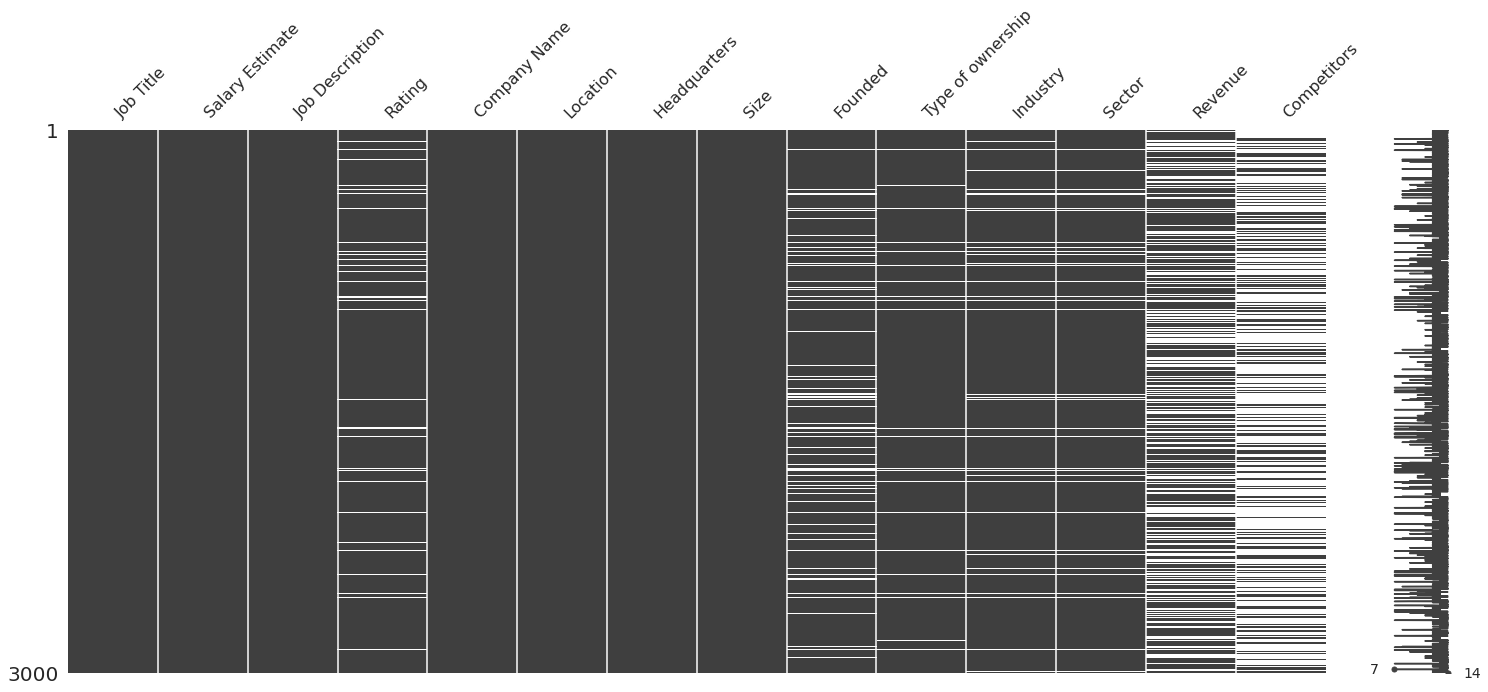

In [ ]:
msno.matrix(totdata)

# Nullity correlations : 

In [ ]:
nulls=[]
for col in totdata.columns :
  if totdata[col].isna().sum()>0:
    nulls+=[totdata[col]]
nulls=pd.concat(nulls,axis=1)

high correlation only exist between columns with little missing values. Safe to remove columns with a lot o missing data and rows with missing data.

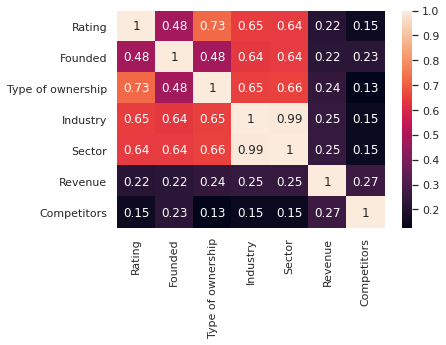

In [ ]:
sns.heatmap(nulls.isna().corr(), annot=True)
plt.savefig("nullity corr.png")
plt.show()

In [ ]:
totdata.isna().sum()

Job Title               0
Salary Estimate         0
Job Description         0
Rating                142
Company Name            0
Location                0
Headquarters            0
Size                    0
Founded               346
Type of ownership      96
Industry              199
Sector                197
Revenue              1048
Competitors          2036
dtype: int64

In [ ]:
totdata=totdata.drop(["Competitors"],axis=1)
totdata=totdata.drop(["Company Name"],axis=1)

In [ ]:
def impute1(totdata) :
  #On founded, sector, Type of ownership
  totdata["Founded"]=totdata["Founded"].fillna(totdata["Founded"].value_counts().index[0])
  totdata["Sector"]=totdata["Sector"].fillna(totdata["Sector"].value_counts().index[0])
  totdata["Type of ownership"]=totdata["Type of ownership"].fillna(totdata["Type of ownership"].value_counts().index[0])
  totdata["Revenue"]=totdata["Revenue"].fillna(totdata["Revenue"].mean())
  return totdata

In [ ]:
totdata=impute1(totdata)

#Pair plot

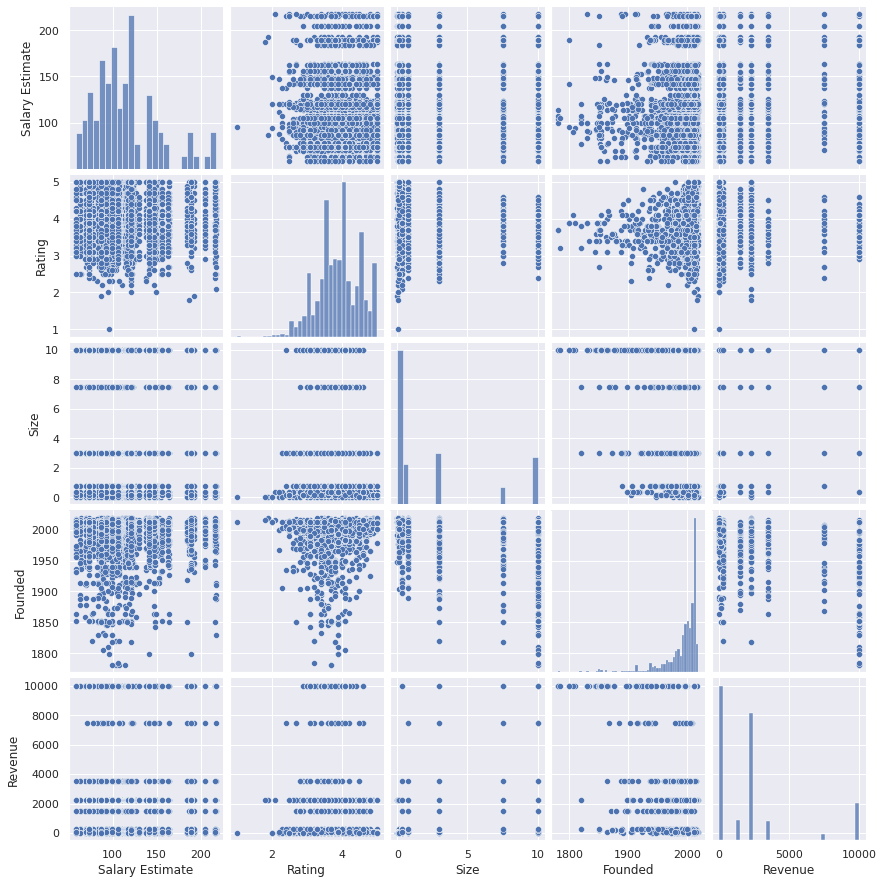

In [ ]:
sns.set()
sns.pairplot(totdata)
plt.savefig("pair plot.png")
plt.show();

# Correlations between columns ( after reaserch this is the expected correlation)

In [ ]:
totdata=totdata.drop(columns=["Revenue"],axis=1)

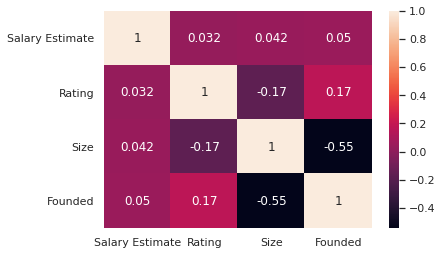

In [ ]:
sns.heatmap(totdata.corr(), annot=True)
plt.savefig("corr before.png")
plt.show()

#Feature Engineering

In [ ]:
def add_feats(totdata) :
  #Job title
  totdata["ML"]=totdata["Job Title"].apply(lambda x: 1 if "ml" in x.lower() or "machine learning" in x.lower() else 0)
  totdata["Data"]=totdata["Job Title"].apply(lambda x: 1 if "data" in x.lower() else 0)
  totdata["Science"]=totdata["Job Title"].apply(lambda x: 1 if "scien" in x.lower() else 0)
  totdata["Engineer"]=totdata["Job Title"].apply(lambda x: 1 if "engineer" in x.lower() else 0)
  totdata["Senior"]=totdata["Job Title"].apply(lambda x: 1 if "senior" in x.lower() else 0)
  totdata["Analysis"]=totdata["Job Title"].apply(lambda x: 1 if "analy" in x.lower() else 0)
  totdata["Cloud"]=totdata["Job Title"].apply(lambda x: 1 if "cloud" in x.lower() else 0)
  totdata=totdata.drop(["Job Title"],axis=1)
  #Job description
  totdata['Python'] = totdata['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
  totdata['R'] = totdata['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() or ",R" in x or "R," in x or ",R" in x or " R " in x in x.lower() else 0)
  totdata['AWS'] = totdata['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
  totdata['Excel'] = totdata['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
  totdata['Spark'] = totdata['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
  totdata['Tableau'] = totdata['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
  totdata['SQL'] = totdata['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
  totdata['TensorFlow'] = totdata['Job Description'].apply(lambda x: 1 if 'tensorflow' in x.lower() else 0)
  totdata['PowerBI'] = totdata['Job Description'].apply(lambda x: 1 if 'powerbi' in x.lower() else 0)
  totdata['SaS'] = totdata['Job Description'].apply(lambda x: 1 if 'sas' in x.lower() else 0)
  totdata['Flask'] = totdata['Job Description'].apply(lambda x: 1 if 'flask' in x.lower() else 0)
  totdata['Hadoop'] = totdata['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)
  totdata['Statistics']=totdata["Job Description"].apply(lambda x:1 if 'statistics' in x.lower() or 'statistical' in x.lower() else 0)
  totdata=totdata.drop(["Job Description"],axis=1)
  #Create Same state column
  totdata['Same State'] = totdata.apply(lambda x: 1 if x.Location == x.Headquarters else 0,axis =1)
  totdata=totdata.drop(["Location"],axis=1)
  totdata=totdata.drop(["Headquarters"],axis=1)
  #replace year with age
  totdata['Age'] = totdata['Founded'].apply(lambda x: x if x==np.nan else 2020-x)
  return totdata

In [ ]:
def one_hot_encode(totdata) :
  totdata=totdata.drop(['Industry'],axis=1)
  totdata=pd.concat([totdata,pd.get_dummies(totdata['Type of ownership'])],axis=1)
  totdata=totdata.drop(['Type of ownership'],axis=1)
  totdata=pd.concat([totdata,pd.get_dummies(totdata['Sector'])],axis=1)
  totdata=totdata.drop(['Sector'],axis=1)
  totdata=totdata.drop(["Founded"],axis=1)
  return totdata

In [ ]:
def impute2(totdata) :
  #On rating, Size
  imp=IterativeImputer(random_state=0)
  imputed=pd.DataFrame(imp.fit_transform(totdata))
  imputed.columns=totdata.columns
  imputed.index=totdata.index
  totdata=imputed
  return totdata

In [ ]:
totdata.head()

,Job Title,Salary Estimate,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector
0,Machine Learning Engineer,64.0,POSITION PURPOSE:\nThis position is responsibl...,3.8,"Ogden, UT","Ogden, UT",3.00,1939.0,Nonprofit Organization,Investment Banking & Asset Management,Finance
1,Aviation Data Scientist and Machine Learning E...,64.0,Why choose between doing meaningful work and h...,3.3,"McLean, VA","Bedford, MA",7.50,1958.0,Nonprofit Organization,Federal Agencies,Government
2,AI/ML Engineer,64.0,Why choose between doing meaningful work and h...,3.3,"McLean, VA","Bedford, MA",7.50,1958.0,Nonprofit Organization,Federal Agencies,Government
3,Perception Engineer,64.0,Kodiak Robotics is not just a software company...,4.7,"Mountain View, CA","Mountain View, CA",0.13,2018.0,Company - Private,Computer Hardware & Software,Information Technology
4,Senior Research Engineer - Biological Imaging ...,64.0,"Sony Corporation of America, located in New Yo...",3.9,"San Jose, CA","San Diego, CA",10.00,1946.0,Subsidiary or Business Segment,Consumer Products Manufacturing,Manufacturing


In [ ]:
totdata_feats=add_feats(totdata)
totdata_feats=one_hot_encode(totdata_feats)
totdata_feats=impute2(totdata_feats)

In [ ]:
totdata_feats.head()

,Salary Estimate,Rating,Size,ML,Data,Science,Engineer,Senior,Analysis,Cloud,Python,R,AWS,Excel,Spark,Tableau,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics,Same State,Age,College / University,Company - Private,Company - Public,Contract,Government,Hospital,Nonprofit Organization,Other Organization,Private Practice / Firm,Self-employed,Subsidiary or Business Segment,Accounting & Legal,Aerospace & Defense,Agriculture & Forestry,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,"Construction, Repair & Maintenance",Consumer Services,Education,Finance,Government,Health Care,Information Technology,Insurance,Manufacturing,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,"Restaurants, Bars & Food Services",Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
0,64.0,3.8,3.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,64.0,3.3,7.50,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,64.0,3.3,7.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,64.0,4.7,0.13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64.0,3.9,10.00,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
totdata_feats.columns=['Salary Estimate', 'Rating', 'Size', 'ML', 'Data', 'Science',
       'Engineer', 'Senior', 'Analysis', 'Cloud', 'Python', 'R', 'AWS',
       'Excel', 'Spark', 'Tableau', 'SQL', 'TensorFlow', 'PowerBI', 'SaS',
       'Flask', 'Hadoop', 'Statistics', 'Same State', 'Age',
       'College / University', 'Company - Private', 'Company - Public',
       'Contract', 'Government1', 'Hospital', 'Nonprofit Organization',
       'Other Organization', 'Private Practice / Firm', 'Self-employed',
       'Subsidiary or Business Segment', 'Accounting & Legal',
       'Aerospace & Defense', 'Agriculture & Forestry',
       'Arts, Entertainment & Recreation', 'Biotech & Pharmaceuticals',
       'Business Services', 'Construction, Repair & Maintenance',
       'Consumer Services', 'Education', 'Finance', 'Government2',
       'Health Care', 'Information Technology', 'Insurance', 'Manufacturing',
       'Media', 'Mining & Metals', 'Non-Profit',
       'Oil, Gas, Energy & Utilities', 'Real Estate',
       'Restaurants, Bars & Food Services', 'Retail', 'Telecommunications',
       'Transportation & Logistics', 'Travel & Tourism']

In [ ]:
totdata_feats.corr()

,Salary Estimate,Rating,Size,ML,Data,Science,Engineer,Senior,Analysis,Cloud,Python,R,AWS,Excel,Spark,Tableau,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics,Same State,Age,College / University,Company - Private,Company - Public,Contract,Government1,Hospital,Nonprofit Organization,Other Organization,Private Practice / Firm,Self-employed,Subsidiary or Business Segment,Accounting & Legal,Aerospace & Defense,Agriculture & Forestry,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,"Construction, Repair & Maintenance",Consumer Services,Education,Finance,Government2,Health Care,Information Technology,Insurance,Manufacturing,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,"Restaurants, Bars & Food Services",Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
Salary Estimate,1.000000,0.034627,0.041567,0.156118,-0.044854,0.101112,-0.058726,0.016037,-0.081626,-0.015014,0.039000,0.023745,-0.053516,-0.022463,-0.017083,-0.026128,-0.096730,0.108987,-0.041255,-0.037508,-0.001026,-0.001346,0.080922,-0.027613,-0.049686,-0.009425,-0.052873,0.039225,0.001023,0.047574,-0.008675,-0.004189,0.012271,0.008567,0.002766,0.019948,0.014779,0.040180,-0.031786,-0.020632,-0.037026,-0.001977,-0.002002,0.015877,-0.032057,-0.056753,0.002310,-0.038773,0.087917,-0.039287,-0.008009,-0.034797,-0.006079,-0.002763,-0.006932,-0.029571,0.023137,-0.002455,0.008070,-0.033257,-0.005600
Rating,0.034627,1.000000,-0.171899,0.005047,-0.028502,-0.023108,0.065334,-0.012693,-0.099047,0.068284,-0.002491,-0.033038,-0.023617,0.009256,-0.025286,-0.108024,-0.060380,0.009017,-0.094721,-0.085101,-0.022241,-0.007088,-0.064300,0.026119,-0.174606,-0.048451,0.211200,-0.122750,0.024549,-0.039412,-0.020399,-0.056529,-0.062843,0.018021,-0.027333,-0.119333,0.007167,0.049897,-0.008262,-0.016049,-0.030250,0.069559,0.002242,-0.026322,-0.040471,-0.073415,-0.039352,-0.049840,0.167406,-0.096758,-0.094033,-0.028212,-0.034436,-0.034329,-0.054923,0.053953,-0.028215,-0.087587,-0.059936,-0.046732,-0.028455
Size,0.041567,-0.171899,1.000000,0.061035,0.039806,0.049626,-0.029287,-0.050227,0.018815,-0.000980,0.065602,0.071628,-0.037775,0.010502,0.007965,0.012840,-0.032061,0.050247,0.041299,0.032524,-0.025039,0.027063,0.054674,-0.134005,0.545959,-0.009476,-0.556152,0.556672,-0.029302,0.002991,-0.000368,0.118719,0.004159,-0.030413,0.064509,0.024274,-0.003377,0.140984,0.027187,-0.006958,0.082807,-0.108791,-0.034184,-0.009468,-0.043599,0.019968,0.051245,0.021710,-0.175732,0.085894,0.083590,-0.010000,-0.012591,0.032655,0.001553,-0.035796,0.037232,0.144591,0.054572,0.007607,-0.001886
ML,0.156118,0.005047,0.061035,1.000000,-0.377695,-0.220659,0.279165,-0.011932,-0.111757,-0.045283,0.129705,-0.043657,-0.044528,-0.072894,0.044727,-0.117178,-0.196000,0.394191,-0.074872,-0.103694,0.016142,0.024617,-0.021413,0.031943,-0.056622,0.094494,-0.072825,0.079566,-0.016736,-0.042530,-0.022468,-0.022417,-0.025957,-0.018336,-0.012959,0.039704,0.009288,0.005498,-0.024848,-0.002752,-0.062142,-0.065272,-0.023688,0.025776,0.027969,-0.038144,0.004183,-0.023666,0.151171,-0.055597,-0.028760,-0.031055,-0.007479,-0.035205,-0.039757,-0.021180,-0.007479,-0.012741,0.015902,0.005134,-0.014966
Data,-0.044854,-0.028502,0.039806,-0.377695,1.000000,0.445939,-0.503587,-0.132985,0.111594,-0.039079,0.301484,0.207663,0.086425,-0.012533,0.277559,0.248683,0.414537,-0.072748,0.137003,0.159563,0.017978,0.222914,0.341781,-0.031232,0.030120,-0.031441,0.050060,-0.038302,-0.014755,0.062379,0.034497,-0.025638,0.022030,0.038225,0.027015,-0.055112,0.025959,-0.030447,0.051800,0.017975,-0.004657,0.042231,0.025959,0.002537,-0.061621,0.048863,-0.000139,-0.025390,-0.032765,0.107624,-0.148667,0.079529,-0.021385,0.033834,0.019702,-0.008202,0.015592,0.052871,-0.036137,-0.039571,-0.024294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
corrs=totdata_feats.corr()

In [ ]:
corrs=corrs.drop(index="Salary Estimate",columns=["Salary Estimate"],axis=1)

In [ ]:
L=[]
for index in corrs.index :
  for col in corrs.columns :
    if 0.6<abs(corrs[index][col])<1 :
      L+=[(index,col)]

In [ ]:
L=list(set([ tuple(sorted(t)) for t in L ]))
L

[('Engineer', 'Science'), ('Company - Private', 'Company - Public')]

In [ ]:
for x in L :
    try :
      totdata_feats=totdata_feats.drop(columns=[x[0]],axis=1)
    except :
      continue

In [ ]:
totdata_feats.columns

Index(['Salary Estimate', 'Rating', 'Size', 'ML', 'Data', 'Science', 'Senior',
       'Analysis', 'Cloud', 'Python', 'R', 'AWS', 'Excel', 'Spark', 'Tableau',
       'SQL', 'TensorFlow', 'PowerBI', 'SaS', 'Flask', 'Hadoop', 'Statistics',
       'Same State', 'Age', 'College / University', 'Company - Public',
       'Contract', 'Government1', 'Hospital', 'Nonprofit Organization',
       'Other Organization', 'Private Practice / Firm', 'Self-employed',
       'Subsidiary or Business Segment', 'Accounting & Legal',
       'Aerospace & Defense', 'Agriculture & Forestry',
       'Arts, Entertainment & Recreation', 'Biotech & Pharmaceuticals',
       'Business Services', 'Construction, Repair & Maintenance',
       'Consumer Services', 'Education', 'Finance', 'Government2',
       'Health Care', 'Information Technology', 'Insurance', 'Manufacturing',
       'Media', 'Mining & Metals', 'Non-Profit',
       'Oil, Gas, Energy & Utilities', 'Real Estate',
       'Restaurants, Bars & Food Services

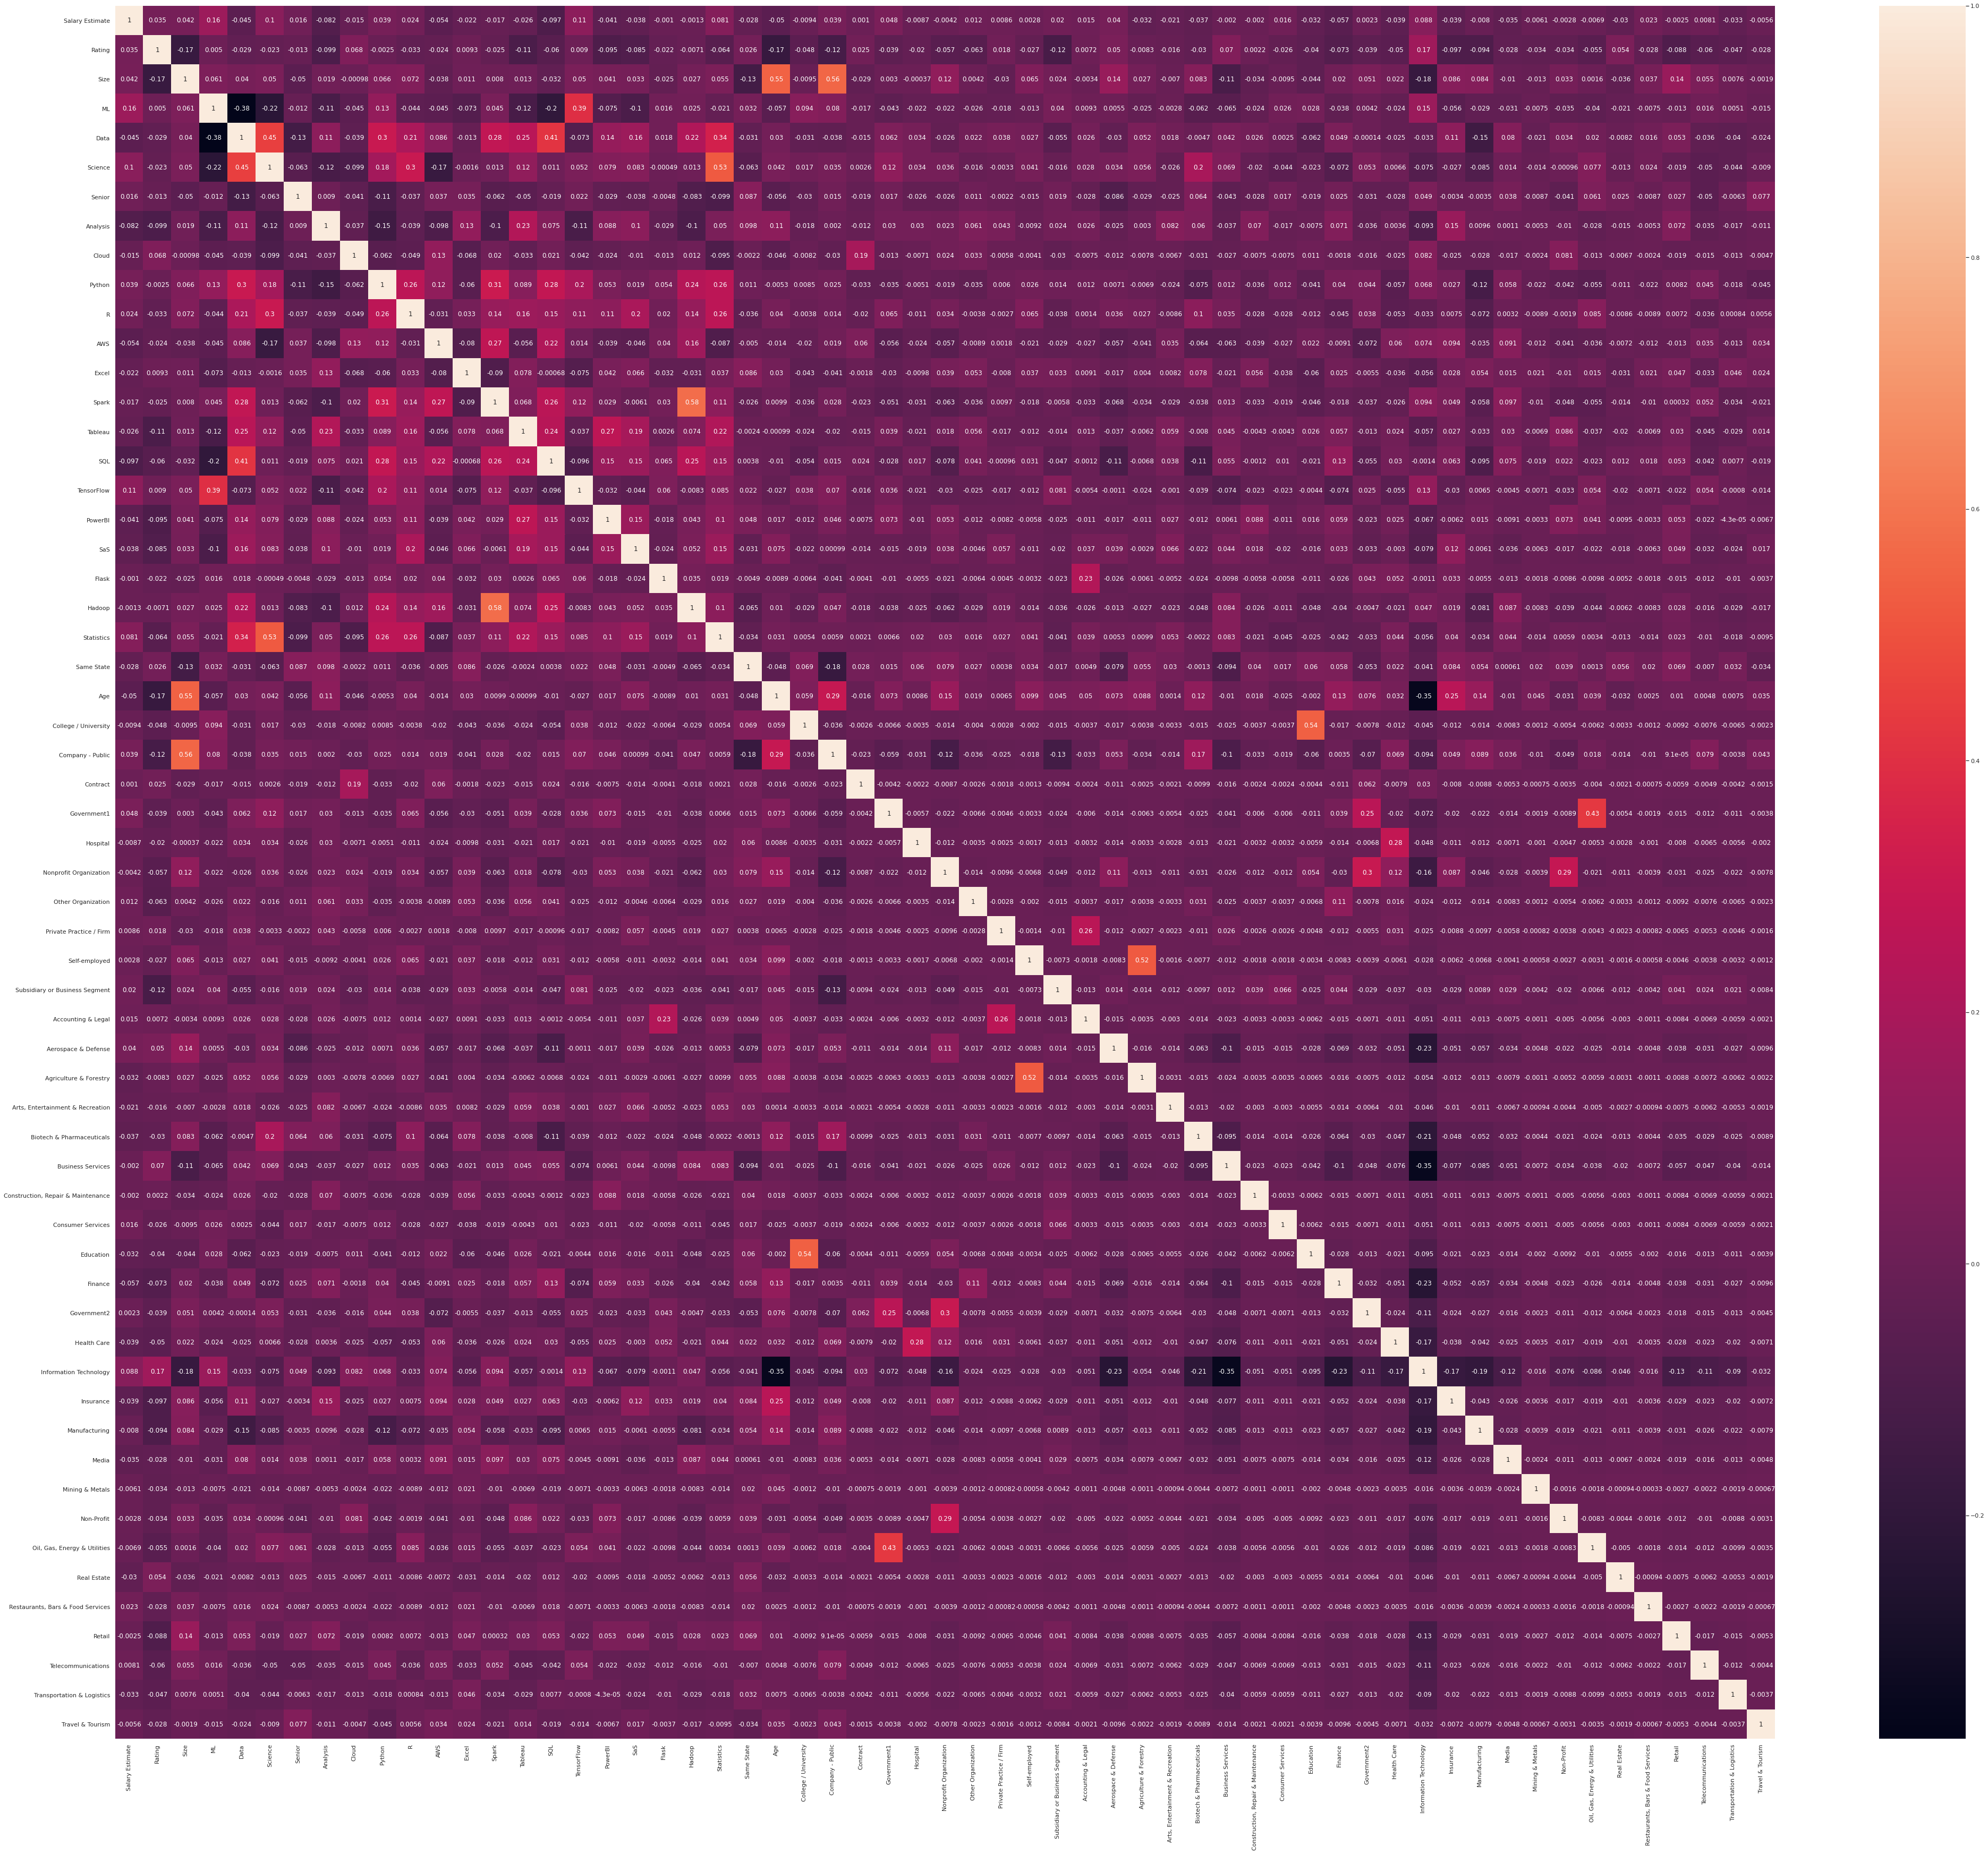

In [ ]:
plt.figure(figsize=(70,60))
sns.heatmap(totdata_feats.corr(), annot=True)
plt.savefig("corr after.png")
plt.show()

In [ ]:
data1=preprocess(pd.read_csv("/content/drive/My Drive/stage/ML_jobs.csv"))
data1=impute1(fix_cols(to_NAN(data1))) 
data2=preprocess(pd.read_csv("/content/drive/My Drive/stage/Data_scientist_jobs.csv"))
data2=impute1(fix_cols(to_NAN(data2)))
data3=preprocess(pd.read_csv("/content/drive/My Drive/stage/Data_engineer_jobs.csv"))
data3=impute1(fix_cols(to_NAN(data3)))
data4=preprocess(pd.read_csv("/content/drive/My Drive/stage/Cloud_jobs.csv"))
data4=impute1(fix_cols(to_NAN(data4)))
data5=preprocess(pd.read_csv("/content/drive/My Drive/stage/Data_analyst_jobs.csv"))
data5=impute1(fix_cols(to_NAN(data5)))
data6=preprocess(pd.read_csv("/content/drive/My Drive/stage/ETL_dev_jobs.csv"))
data6=impute1(fix_cols(to_NAN(data6)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


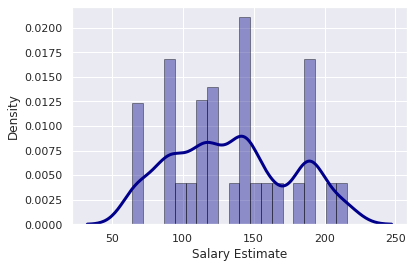

In [ ]:
sns_plot=sns.distplot(data1['Salary Estimate'], hist=True, kde=True,
             color = 'darkblue', bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns_plot=sns_plot.get_figure()
sns_plot.savefig("Salary Estimate ML plot.png")

In [ ]:
#ML
data1["Salary Estimate"].describe()

count    1000.00000
mean      134.22200
std        41.64256
min        64.00000
25%        98.00000
50%       138.00000
75%       164.00000
max       216.00000
Name: Salary Estimate, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


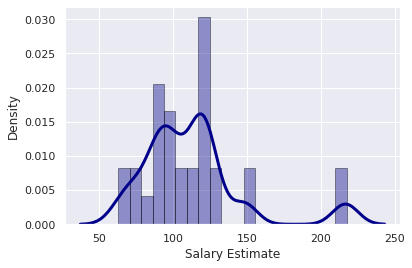

In [ ]:
sns_plot=sns.distplot(data2['Salary Estimate'], hist=True, kde=True,
             color = 'darkblue', bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns_plot=sns_plot.get_figure()
sns_plot.savefig("Salary Estimate Data science plot.png")

In [ ]:
#data science
data2["Salary Estimate"].describe()

count    1000.000000
mean      112.307000
std        34.249851
min        63.000000
25%        89.500000
50%       107.000000
75%       121.500000
max       217.500000
Name: Salary Estimate, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


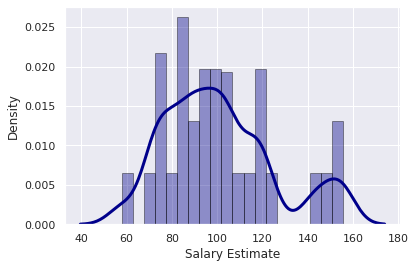

In [ ]:
sns_plot=sns.distplot(data3['Salary Estimate'], hist=True, kde=True,
             color = 'darkblue', bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns_plot=sns_plot.get_figure()
sns_plot.savefig("Salary Estimate Data engineer plot.png")

In [ ]:
#data engineer
data3["Salary Estimate"].describe()

count    1000.00000
mean      100.80000
std        24.48194
min        58.00000
25%        82.50000
50%        99.50000
75%       116.50000
max       155.50000
Name: Salary Estimate, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


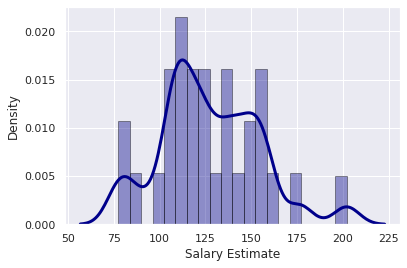

In [ ]:
sns_plot=sns.distplot(data4['Salary Estimate'], hist=True, kde=True,
             color = 'darkblue', bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns_plot=sns_plot.get_figure()
sns_plot.savefig("Salary Estimate cloud plot.png")

In [ ]:
#cloud
data4["Salary Estimate"].describe()

count    958.000000
mean     127.427975
std       27.294411
min       77.500000
25%      109.000000
50%      122.500000
75%      147.000000
max      202.000000
Name: Salary Estimate, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


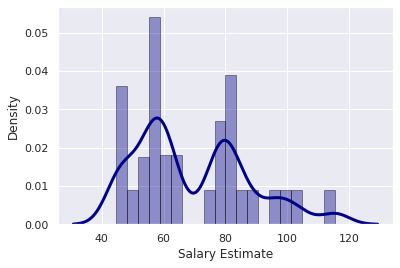

In [ ]:
sns_plot=sns.distplot(data5['Salary Estimate'], hist=True, kde=True,
             color = 'darkblue', bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns_plot=sns_plot.get_figure()
sns_plot.savefig("Salary Estimate data analyst plot.png")

In [ ]:
#data analyst
data5["Salary Estimate"].describe()

count    1000.000000
mean       69.447000
std        18.255272
min        44.500000
25%        56.500000
50%        63.000000
75%        80.500000
max       115.500000
Name: Salary Estimate, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


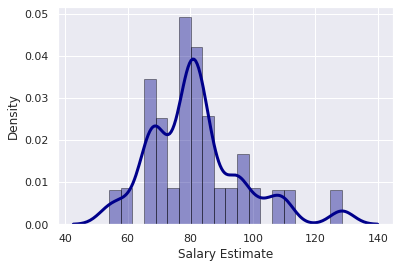

In [ ]:
sns_plot=sns.distplot(data6['Salary Estimate'], hist=True, kde=True,
             color = 'darkblue', bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns_plot=sns_plot.get_figure()
sns_plot.savefig("Salary Estimate ETL plot.png")

In [ ]:
#ETL
data6["Salary Estimate"].describe()

count    1000.000000
mean       81.770500
std        15.118917
min        54.000000
25%        69.500000
50%        80.500000
75%        85.500000
max       128.500000
Name: Salary Estimate, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


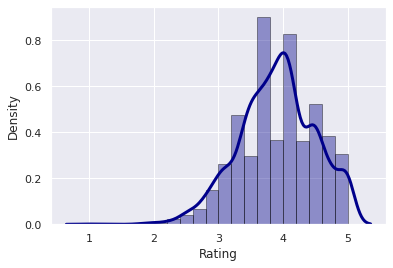

In [ ]:
sns_plot=sns.distplot(totdata_feats['Rating'], hist=True, kde=True,
             color = 'darkblue', bins=20, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns_plot=sns_plot.get_figure()
sns_plot.savefig("Rating plot.png")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


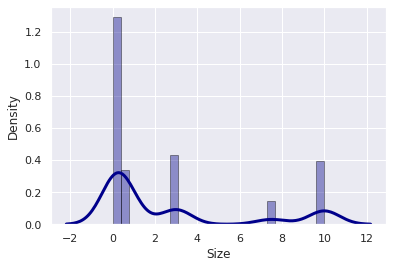

In [ ]:
sns_plot=sns.distplot(totdata_feats['Size'], hist=True, kde=True,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns_plot=sns_plot.get_figure()
sns_plot.savefig("Size plot.png")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


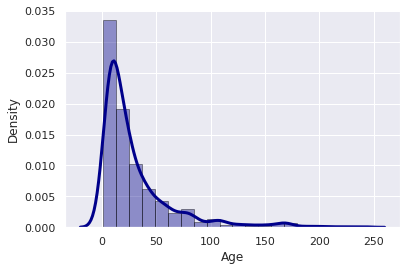

In [ ]:
sns_plot=sns.distplot(totdata_feats['Age'], hist=True, kde=True,
             color = 'darkblue', bins=20,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns_plot=sns_plot.get_figure()
sns_plot.savefig("Age plot.png")

In [ ]:
totdata_feats.describe()

,Salary Estimate,Rating,Size,ML,Data,Science,Senior,Analysis,Cloud,Python,R,AWS,Excel,Spark,Tableau,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics,Same State,Age,College / University,Company - Public,Contract,Government1,Hospital,Nonprofit Organization,Other Organization,Private Practice / Firm,Self-employed,Subsidiary or Business Segment,Accounting & Legal,Aerospace & Defense,Agriculture & Forestry,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,"Construction, Repair & Maintenance",Consumer Services,Education,Finance,Government2,Health Care,Information Technology,Insurance,Manufacturing,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,"Restaurants, Bars & Food Services",Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,115.776333,3.907234,2.624250,0.143667,0.578333,0.369000,0.185333,0.077667,0.016333,0.601333,0.190333,0.315000,0.422000,0.241000,0.124667,0.510667,0.131667,0.032333,0.105667,0.010000,0.170000,0.375667,0.457667,30.289667,0.004000,0.241667,0.001667,0.010667,0.003000,0.043667,0.004000,0.002000,0.001000,0.050667,0.003333,0.064000,0.003667,0.002667,0.055667,0.133000,0.003333,0.003333,0.011333,0.064667,0.015000,0.036333,0.438667,0.037333,0.044667,0.016667,0.000333,0.007333,0.009333,0.002667,0.000333,0.020667,0.01400,0.010333,0.001333
std,36.882443,0.587240,3.618054,0.350810,0.493908,0.482614,0.388633,0.267691,0.126775,0.489706,0.392630,0.464593,0.493961,0.427762,0.330396,0.499970,0.338184,0.176913,0.307462,0.099515,0.375695,0.484375,0.498288,34.997839,0.063129,0.428165,0.040798,0.102744,0.054699,0.204386,0.063129,0.044684,0.031612,0.219353,0.057648,0.244794,0.060452,0.051579,0.229315,0.339631,0.057648,0.057648,0.105871,0.245978,0.121573,0.187149,0.496307,0.189609,0.206605,0.128040,0.018257,0.085335,0.096173,0.051579,0.018257,0.142290,0.11751,0.101143,0.036497
min,58.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,89.500000,3.500000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,107.500000,3.900000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
totdata_feats["Salary Estimate"].describe()

count    3000.000000
mean      115.776333
std        36.882443
min        58.000000
25%        89.500000
50%       107.500000
75%       138.000000
max       217.500000
Name: Salary Estimate, dtype: float64

In [ ]:
totdata_feats.isna().sum()

Salary Estimate                       0
Rating                                0
Size                                  0
ML                                    0
Data                                  0
Science                               0
Senior                                0
Analysis                              0
Cloud                                 0
Python                                0
R                                     0
AWS                                   0
Excel                                 0
Spark                                 0
Tableau                               0
SQL                                   0
TensorFlow                            0
PowerBI                               0
SaS                                   0
Flask                                 0
Hadoop                                0
Statistics                            0
Same State                            0
Age                                   0
College / University                  0


#Models and Comparaison

In [ ]:
Y=totdata_feats['Salary Estimate']
X=totdata_feats.drop(['Salary Estimate'],axis=1)

In [ ]:
Y

0       64.0
1       64.0
2       64.0
3       64.0
4       64.0
        ... 
2995    73.5
2996    73.5
2997    73.5
2998    73.5
2999    73.5
Name: Salary Estimate, Length: 3000, dtype: float64

In [ ]:
Y.describe()

count    3000.000000
mean      115.776333
std        36.882443
min        58.000000
25%        89.500000
50%       107.500000
75%       138.000000
max       217.500000
Name: Salary Estimate, dtype: float64

In [ ]:
X

,Rating,Size,ML,Data,Science,Senior,Analysis,Cloud,Python,R,AWS,Excel,Spark,Tableau,SQL,TensorFlow,PowerBI,SaS,Flask,Hadoop,Statistics,Same State,Age,College / University,Company - Public,Contract,Government1,Hospital,Nonprofit Organization,Other Organization,Private Practice / Firm,Self-employed,Subsidiary or Business Segment,Accounting & Legal,Aerospace & Defense,Agriculture & Forestry,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,"Construction, Repair & Maintenance",Consumer Services,Education,Finance,Government2,Health Care,Information Technology,Insurance,Manufacturing,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,"Restaurants, Bars & Food Services",Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
0,3.8,3.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,81.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.3,7.50,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.3,7.50,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.7,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.9,10.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2.5,0.13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,5.0,0.13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,4.1,10.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,3.9,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
stand_scaler = preprocessing.StandardScaler()
min_max_scaler=preprocessing.MinMaxScaler()
x_scaled = stand_scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled)
x_scaled.columns=X.columns
x_scaled.index=X.index
x_minmax=min_max_scaler.fit_transform(X)
x_minmax = pd.DataFrame(x_minmax)
x_minmax.columns=X.columns
x_minmax.index=X.index

In [ ]:
import statsmodels.api as sm

In [ ]:
X_sm = sm.add_constant(x_scaled)
OLSreg = sm.OLS(Y,X_sm)
res=OLSreg.fit()

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Salary Estimate   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     4.370
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           1.57e-24
Time:                        15:11:10   Log-Likelihood:                -14958.
No. Observations:                3000   AIC:                         3.003e+04
Df Residuals:                    2942   BIC:                         3.038e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                115.7763      0.653    177.354      0.000     114.496     117.056
Rating                                 0.8539      0.706      1.210      0.227      -0.530       2.238
Size                                   1.5059      0.973      1.548      0.122      -0.401       3.413
ML                                     4.8820      0.829      5.888      0.000       3.256       6.508
Data                                  -0.9375      0.955     -0.981      0.327      -2.811       0.936
Science                                4.5998      0.959      4.794      0.000       2.719       6.481
Senior                                 1.0558      0.684      1.544      0.123      -0.285       2.397
Analysis                              -1.2935      0.745     -1.736      0.083      -2.755       0.168
Cloud                                 -0.0709      0.686     -0.103      0.918      -1.416       1.275
Python                                 0.0043      0.796      0.005      0.996      -1.556       1.565
R                                      0.0225      0.741      0.030      0.976      -1.430       1.475
AWS                                   -0.2962      0.735     -0.403      0.687      -1.738       1.146
Excel                                 -0.1193      0.682     -0.175      0.861      -1.457       1.219
Spark                                 -0.9343      0.872     -1.071      0.284      -2.644       0.776
Tableau                                0.2799      0.742      0.377      0.706      -1.174       1.734
SQL                                   -1.9000      0.815     -2.331      0.020      -3.498      -0.302
TensorFlow                             0.7164      0.753      0.951      0.342      -0.761       2.193
PowerBI                               -1.1377      0.699     -1.627      0.104      -2.509       0.233
SaS                                   -0.6932      0.705     -0.983      0.325      -2.075       0.689
Flask                                 -0.0130      0.682     -0.019      0.985      -1.351       1.325
Hadoop                                 0.7125      0.829      0.860      0.390      -0.912       2.337
Statistics                             1.5982      0.841      1.901      0.057      -0.050       3.246
Same State                            -0.2272      0.704     -0.322      0.747      -1.608       1.154
Age                                   -2.0206      0.886     -2.280      0.023      -3.758      -0.283
College / University                  -0.3591      0.792     -0.453      0.650      -1.912       1.194
Company - Public                       1.5854      0.883      1.796      0.073      -0.146       3.316
Contract                               0.1993      0.671      0.297      0.766      -1.115      

In [ ]:
cols=[]
m=0
for k in res.pvalues :
  if k < 0.1 :
    cols+=[res.pvalues.keys()[m]]
  m+=1

In [ ]:
cols

['const',
 'ML',
 'Science',
 'Analysis',
 'SQL',
 'Statistics',
 'Age',
 'Company - Public',
 'Government1',
 'Other Organization',
 'Agriculture & Forestry',
 'Biotech & Pharmaceuticals',
 'Health Care',
 'Information Technology',
 'Oil, Gas, Energy & Utilities']

In [ ]:
def ANNmodel(alpha,num_layers) :
  model = models.Sequential()
  i=0
  model.add(layers.Dense(20, activation='relu',input_dim=x_chosen_minmax.shape[1],name="layer"+str(i)))
  model.add(layers.BatchNormalization(name="batchnorm"+str(i)))
  model.add(layers.Dropout(0.2,name="dropout"+str(i)))
  for i in range(1,num_layers) :
    model.add(layers.Dense(20, activation='tanh',name="layer"+str(i)))
    model.add(layers.BatchNormalization(name="batchnorm"+str(i)))
    model.add(layers.Dropout(0.2,name="dropout"+str(i)))
  model.add(layers.Dense(1, activation='relu',name="layer_fin"))
  ada = Adam(learning_rate=alpha)
  model.compile(optimizer= ada, loss="mean_absolute_error", metrics=['mean_absolute_error'])
  return model

In [ ]:
x_chosen=x_scaled[cols[1:]]
x_chosen_minmax=x_minmax[cols[1:]]

In [ ]:
data_dmatrix = xgb.DMatrix(data=x_scaled,label=Y)

In [ ]:
params = {'colsample_bytree': 0.3,'learning_rate': 0.08,'max_depth': 3, 'alpha': 10}

In [ ]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="mae", as_pandas=True)

In [ ]:
cv_results.head()

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,106.068835,0.335689,106.070832,3.290356
1,97.596031,0.308361,97.587022,3.313952
2,89.804114,0.282510,89.805347,3.328565
3,82.633121,0.260964,82.642971,3.356243
4,76.035701,0.240978,76.037302,3.374367


In [ ]:
print((cv_results["test-mae-mean"]).tail(1))

35    27.168985
Name: test-mae-mean, dtype: float64


In [ ]:
xg_reg=xgb.XGBRegressor(objective ='reg:squarederror',colsample_bytree = 0.3, learning_rate = 0.08,
                max_depth = 5, alpha = 10, n_estimators = 100,eval_metric="mae")

In [ ]:
xg_reg.fit(x_scaled,Y)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, eval_metric='mae',
             gamma=0, importance_type='gain', learning_rate=0.08,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [ ]:
imps=[]
for col,imp in zip(x_scaled.columns,xg_reg.feature_importances_) :
  imps+=[(col,imp)]

In [ ]:
imps=sorted(imps, key=lambda tup: tup[1])
imps=imps[::-1]

Important Features according to XGboost(boosting forest algorithm)

In [ ]:
imps[:25]

[('Science', 0.10512866),
 ('ML', 0.06853736),
 ('Data', 0.03197371),
 ('TensorFlow', 0.02585782),
 ('SQL', 0.025655499),
 ('Retail', 0.022939052),
 ('Biotech & Pharmaceuticals', 0.022497104),
 ('Aerospace & Defense', 0.021546792),
 ('Information Technology', 0.020794785),
 ('Engineer', 0.019404138),
 ('Education', 0.019287968),
 ('Health Care', 0.019084783),
 ('Age', 0.018823111),
 ('Company - Private', 0.018689241),
 ('Rating', 0.018424638),
 ('Tableau', 0.018242152),
 ('Company - Public', 0.017785799),
 ('Python', 0.01729288),
 ('Agriculture & Forestry', 0.017255431),
 ('Business Services', 0.016862053),
 ('Private Practice / Firm', 0.01684072),
 ('Insurance', 0.016238894),
 ('Size', 0.016092937),
 ('Contract', 0.015945734),
 ('Statistics', 0.01574792)]

plot of feature importance

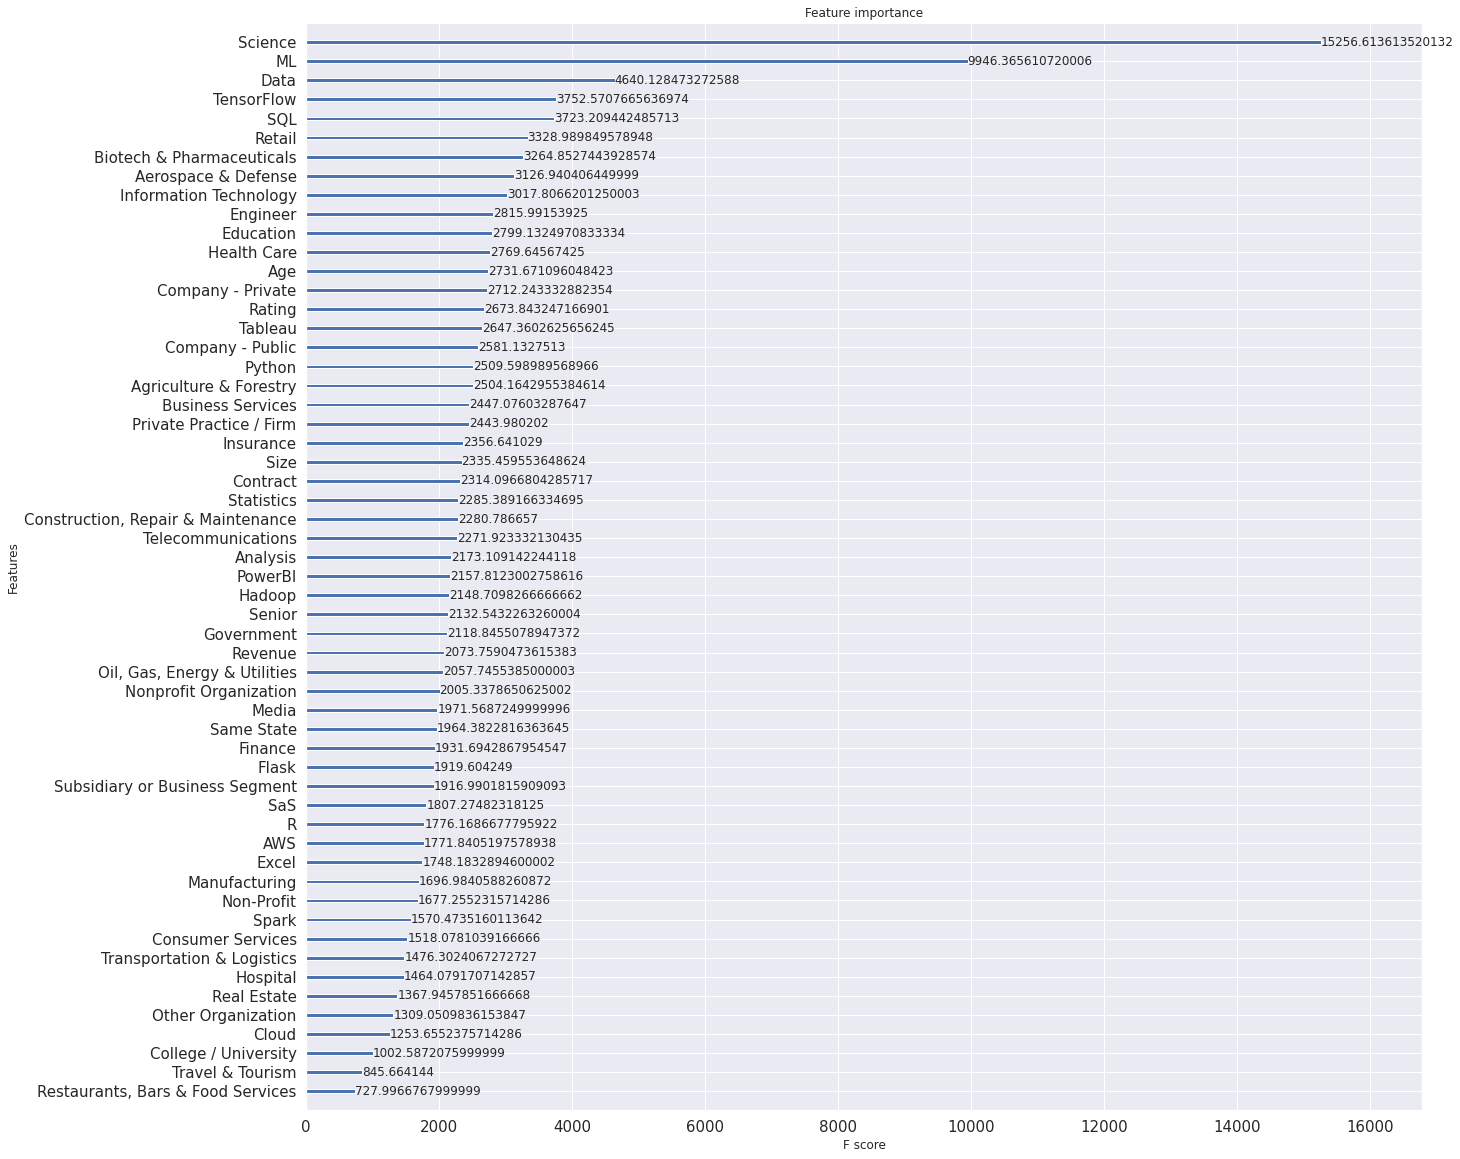

In [ ]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plot_importance(xg_reg, importance_type='gain')
plt.savefig("xgboost importance")
plt.show()

In [ ]:
ress=[]
for key,val in zip(res.pvalues.keys(),res.pvalues.values):
  ress+=[(key,val)]
ress=sorted(ress, key=lambda tup: tup[1])

Important Features according to linear model

In [ ]:
ress[:21]

[('const', 0.0),
 ('ML', 3.520190876244492e-08),
 ('Statistics', 1.3881405769290358e-06),
 ('Government1', 0.00025639450223870734),
 ('Analysis', 0.001993303027355409),
 ('SQL', 0.004022410378912482),
 ('Information Technology', 0.02673968337062167),
 ('Aerospace & Defense', 0.028774867780476023),
 ('Consumer Services', 0.03909967437533848),
 ('Restaurants, Bars & Food Services', 0.04276010947171959),
 ('Business Services', 0.046188924772306385),
 ('Size', 0.04959605313033309),
 ('Retail', 0.05379683261334254),
 ('Construction, Repair & Maintenance', 0.05629093304817708),
 ('Telecommunications', 0.058369650078224485),
 ('Manufacturing', 0.06394912431192329),
 ('Accounting & Legal', 0.07400747457121679),
 ('Non-Profit', 0.0890819127783829),
 ('Senior', 0.08965981856858324),
 ('Insurance', 0.09540568162607857),
 ('Finance', 0.12979215614320638)]

In [ ]:
rfreg = RandomForestRegressor(max_depth=3,n_estimators=200)
lmreg = LinearRegression()
lassCVreg = LassoCV()

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
cross=cross_val_score(lassCVreg, x_chosen, Y, scoring='neg_mean_absolute_error',cv=kfold)
print("lasso CV :",cross.mean())
cross=cross_val_score(lmreg, x_chosen, Y, scoring='neg_mean_absolute_error',cv=kfold)
print("linear reg :",cross.mean())
cross=cross_val_score(rfreg, x_chosen, Y, scoring='neg_mean_absolute_error',cv=kfold)
print("random forest :",cross.mean())

lasso CV : -27.685149985743596
linear reg : -27.69035346738223
random forest : -27.688680902275898


In [ ]:
lassCVreg.fit(x_chosen,Y)
lmreg.fit(x_chosen,Y)
rfreg.fit(x_chosen,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
import pickle

In [ ]:
with open('lassoCV_reg.pkl', 'wb') as fid:
    pickle.dump(lassCVreg, fid)
with open('linear_model_reg.pkl', 'wb') as fid:
    pickle.dump(lmreg, fid)
with open('random_forest_reg.pkl', 'wb') as fid:
    pickle.dump(rfreg, fid)

In [ ]:
checkpoint = ModelCheckpoint("BestANN_model.model",monitor='mean_absolute_error', patience=10,save_best_only=True,baseline=10)
callbacks = [ ReduceLROnPlateau(monitor='mean_absolute_error', patience=10),
              EarlyStopping(monitor='val_mean_absolute_error', min_delta=1, patience=10),checkpoint]
number_of_layers=30
history = ANNmodel(0.1,number_of_layers).fit(x_chosen_minmax, Y,
                    batch_size=100,
                    epochs=200,
                    validation_split=0.1,
                    verbose=0,
                    callbacks=callbacks)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: BestANN_model.model/assets
INFO:tensorflow:Assets written to: BestANN_model.model/assets
INFO:tensorflow:Assets written to: BestANN_model.model/assets
INFO:tensorflow:Assets written to: BestANN_model.model/assets
INFO:tensorflow:Assets written to: BestANN_model.model/assets


In [ ]:
print("train mean absolute error :",history.history['mean_absolute_error'][-1])

train mean absolute error : 30.48358726501465


In [ ]:
print("validation mean absolute error :",history.history['val_mean_absolute_error'][-1])

validation mean absolute error : 22.03028106689453


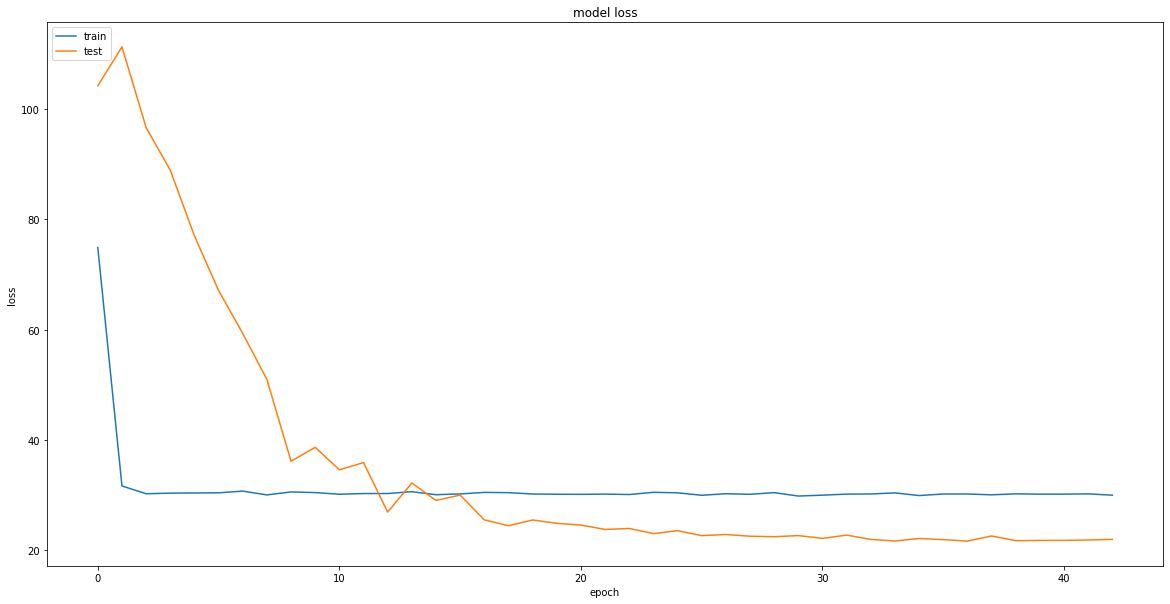

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# FUNCTIONS YOU'LL USE

In [ ]:
def preprocess(data_eng) :
  for i in range(len(data_eng)) :
    data_eng["Size"][i]=re.sub("\D+"," ",data_eng["Size"][i])
    data_eng["Size"][i]=data_eng["Size"][i].split(" ")
    data_eng["Size"][i].remove("")
    if data_eng["Size"][i]==[""] :
      data_eng["Size"][i]=-1
    data_eng["Size"][i]=np.array(data_eng["Size"][i]).astype(np.float).mean()/1000
    data_eng["Size"][i]=round(data_eng["Size"][i],2)
    data_eng["Salary Estimate"][i]=re.sub(str(" \\(Glassdoor est.\\)"),"",data_eng["Salary Estimate"][i])
    data_eng["Company Name"][i]=re.sub(str("\n[0-9]\.[0-9]"),"",data_eng["Company Name"][i])
    data_eng["Salary Estimate"][i]=re.sub(str("\$"),"",data_eng["Salary Estimate"][i])
    data_eng["Salary Estimate"][i]=re.sub(str("K"),"",data_eng["Salary Estimate"][i])
    data_eng["Salary Estimate"][i]=re.sub("[a-zA-Z]|\(|\.|\)",'',data_eng["Salary Estimate"][i])
    data_eng["Salary Estimate"][i]=np.array(data_eng["Salary Estimate"][i].split("-")).astype(np.float).mean()
    data_eng["Revenue"][i] = re.sub("to"," ",data_eng["Revenue"][i])
    data_eng["Revenue"][i] = re.sub("\$|\(USD\)|\+|Less than","",data_eng["Revenue"][i])
    if "million" in data_eng["Revenue"][i] and "billion" in data_eng["Revenue"][i] :
      x=data_eng["Revenue"][i].split()
      x[x.index("million")]=""
      x[0:2]=[''.join(x[0:2])]
      x[x.index("billion")]="000"
      x[2:4]=[''.join(x[2:4])]
      data_eng["Revenue"][i]=np.array(x).astype(np.float).mean()
    elif "million" in data_eng["Revenue"][i] :
      data_eng["Revenue"][i] = re.sub("million","",data_eng["Revenue"][i])
      data_eng["Revenue"][i] = np.array(data_eng["Revenue"][i].split()).astype(np.float).mean()
    elif "billion" in data_eng["Revenue"][i] :
      data_eng["Revenue"][i] = re.sub("billion","",data_eng["Revenue"][i])
      data_eng["Revenue"][i] = np.array(data_eng["Revenue"][i].split()).astype(np.float).mean()
      data_eng["Revenue"][i] = data_eng["Revenue"][i]*(10**3)
  return data_eng

In [ ]:
def to_NAN(totdata) :
  for i in range(len(totdata)) :
    if type(totdata["Revenue"].iloc[i]) is str :
      totdata["Revenue"].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata["Competitors"].iloc[i]=="-1" :
      totdata["Competitors"].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata['Type of ownership'].iloc[i]=="-1" or totdata['Type of ownership'].iloc[i]=='Unknown' :
      totdata['Type of ownership'].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata['Founded'].iloc[i]==-1 :
      totdata['Founded'].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata['Size'].iloc[i]==-1 :
      totdata['Size'].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata['Sector'].iloc[i]=="-1" :
      totdata['Sector'].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata['Rating'].iloc[i]==-1 :
      totdata['Rating'].iloc[i]=np.nan
  for i in range(len(totdata)) :
    if totdata['Industry'].iloc[i]=="-1" :
      totdata['Industry'].iloc[i]=np.nan
  return totdata

In [ ]:
def fix_cols(totdata) :
  totdata["Salary Estimate"]=totdata["Salary Estimate"].astype("float64")
  totdata["Size"]=totdata["Size"].astype("float64")
  totdata["Revenue"]=totdata["Revenue"].astype("float64")
  return totdata

In [ ]:
def impute1(totdata) :
  #On founded, sector, Type of ownership
  totdata["Founded"]=totdata["Founded"].fillna(totdata["Founded"].value_counts().index[0])
  totdata["Sector"]=totdata["Sector"].fillna(totdata["Sector"].value_counts().index[0])
  totdata["Type of ownership"]=totdata["Type of ownership"].fillna(totdata["Type of ownership"].value_counts().index[0])
  totdata["Revenue"]=totdata["Revenue"].fillna(totdata["Revenue"].mean())
  return totdata

In [ ]:
def add_feats(totdata) :
  #Job title
  totdata["ML"]=totdata["Job Title"].apply(lambda x: 1 if "ml" in x.lower() or "machine learning" in x.lower() else 0)
  totdata["Data"]=totdata["Job Title"].apply(lambda x: 1 if "data" in x.lower() else 0)
  totdata["Science"]=totdata["Job Title"].apply(lambda x: 1 if "scien" in x.lower() else 0)
  totdata["Engineer"]=totdata["Job Title"].apply(lambda x: 1 if "engineer" in x.lower() else 0)
  totdata["Senior"]=totdata["Job Title"].apply(lambda x: 1 if "senior" in x.lower() else 0)
  totdata["Analysis"]=totdata["Job Title"].apply(lambda x: 1 if "analy" in x.lower() else 0)
  totdata=totdata.drop(["Job Title"],axis=1)
  #Job description
  totdata['Python'] = totdata['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
  totdata['R'] = totdata['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() or ",R" in x or "R," in x or ",R" in x or " R " in x in x.lower() else 0)
  totdata['AWS'] = totdata['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
  totdata['Excel'] = totdata['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
  totdata['Spark'] = totdata['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
  totdata['Tableau'] = totdata['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
  totdata['SQL'] = totdata['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
  totdata['TensorFlow'] = totdata['Job Description'].apply(lambda x: 1 if 'tensorflow' in x.lower() else 0)
  totdata['PowerBI'] = totdata['Job Description'].apply(lambda x: 1 if 'powerbi' in x.lower() else 0)
  totdata['SaS'] = totdata['Job Description'].apply(lambda x: 1 if 'sas' in x.lower() else 0)
  totdata['Flask'] = totdata['Job Description'].apply(lambda x: 1 if 'flask' in x.lower() else 0)
  totdata['Hadoop'] = totdata['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)
  totdata['Statistics']=totdata["Job Description"].apply(lambda x:1 if 'statistics' in x.lower() or 'statistical' in x.lower() else 0)
  totdata=totdata.drop(["Job Description"],axis=1)
  #Create Same state column
  totdata['Same State'] = totdata.apply(lambda x: 1 if x.Location == x.Headquarters else 0,axis =1)
  totdata=totdata.drop(["Location"],axis=1)
  totdata=totdata.drop(["Headquarters"],axis=1)
  #replace year with age
  totdata['Age'] = totdata['Founded'].apply(lambda x: x if x==np.nan else 2020-x)
  return totdata

In [ ]:
def one_hot_encode(totdata) :
  totdata=totdata.drop(['Industry'],axis=1)
  totdata=pd.concat([totdata,pd.get_dummies(totdata['Type of ownership'])],axis=1)
  totdata=totdata.drop(['Type of ownership'],axis=1)
  totdata=pd.concat([totdata,pd.get_dummies(totdata['Sector'])],axis=1)
  totdata=totdata.drop(['Sector'],axis=1)
  totdata=totdata.drop(["Founded"],axis=1)
  return totdata

In [ ]:
def impute2(totdata) :
  #On rating, Size
  imp=IterativeImputer(random_state=0)
  imputed=pd.DataFrame(imp.fit_transform(totdata))
  imputed.columns=totdata.columns
  imputed.index=totdata.index
  totdata=imputed
  return totdata

# Using RNN

In [ ]:
data1=pd.read_csv("/content/drive/My Drive/stage/ML_jobs.csv")
data2=pd.read_csv("/content/drive/My Drive/stage/Data_scientist_jobs.csv")
data3=pd.read_csv("/content/drive/My Drive/stage/Data_engineer_jobs.csv")
data4=pd.read_csv("/content/drive/My Drive/stage/Cloud_jobs.csv")
data5=pd.read_csv("/content/drive/My Drive/stage/Data_analyst_jobs.csv")
data6=pd.read_csv("/content/drive/My Drive/stage/ETL_dev_jobs.csv")

In [ ]:
totdata=pd.concat([data1,data2,data3,data4,data5,data6],ignore_index=True)

In [ ]:
Y=totdata["Salary Estimate"]

In [ ]:
Y=Y.apply(lambda x:x.split("-"))

In [ ]:
for i in range(len(Y)) :
  for j in range(2) :
    Y[i][j]=re.sub("\D+","",Y[i][j])
    Y[i][j]=int(Y[i][j])

In [ ]:
Y = Y.apply(lambda x: np.array(x).mean())

In [ ]:
Y

0       64.0
1       64.0
2       64.0
3       64.0
4       64.0
        ... 
5953    79.0
5954    79.0
5955    79.0
5956    79.0
5957    79.0
Name: Salary Estimate, Length: 5958, dtype: float64

In [ ]:
totdata=preprocess(totdata)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

save title and description into two variables

In [ ]:
job_title=totdata["Job Title"]
job_desc=totdata["Job Description"]

download stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

word stemming

In [ ]:
def clean(text) :
  text = list(tokenize(text,to_lower=True))
  text = [w for w in text if w not in stopwords.words('english')]
  eng = SnowballStemmer('english')
  text = [eng.stem(w) for w in text]
  return text

In [ ]:
job_title=job_title.apply(lambda x:clean(x))
job_title=job_title.apply(lambda x:" ".join(x))

In [ ]:
job_desc=job_desc.apply(lambda x:clean(x))
job_desc=job_desc.apply(lambda x:" ".join(x))

add title at the begining of job description to get a full info on those two columns at once 

In [ ]:
titles_desc=[]
for i in range(len(job_desc)) :
  titles_desc+=[job_title[i]+" "+job_desc[i]]

In [ ]:
titles_desc[80]

'senior data scientist sparkpost unifi email deliveri analyt leverag world largest commerci email deliveri data footprint custom reli sparkpost infrastructur insight execut data driven email program meet exceed busi object softwar send near world commerci email that trillion email year world sophist email sender includ salesforc oracl adob capit one zillow pinterest twitter look senior data scientist join data scienc team work remot either columbia md san francisco ca offic posit report direct vp data scienc play signific role design develop innov impact custom face intern data product enabl sparkpost continu market leadership focus research model prototyp work product manag engin custom face team envisag new featur product assist operation research entrepreneuri mindset passion proven track record build innov data product larg scale dataset strong compet data scienc softwar engin practic practic expertis prototyp data product data pipelin exploratori data analysi machin learn familiar

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(titles_desc)

In [ ]:
X

<5958x16995 sparse matrix of type '<class 'numpy.float64'>'
	with 1237335 stored elements in Compressed Sparse Row format>

In [ ]:
X=X.toarray()
X = X.reshape(X.shape[0], 1, X.shape[1])

In [ ]:
X.shape

(5958, 1, 16995)

In [ ]:
def build_RNN():
  model = Sequential()
  model.add(LSTM(250, dropout=0.3, recurrent_dropout=0.2,return_sequences=True, input_shape = (None,X.shape[2])))
  model.add(layers.Activation(activation="relu"))
  model.add(layers.BatchNormalization())
  model.add(Dense(60, activation="relu"))
  model.add(layers.Dropout(0.4))
  model.add(layers.BatchNormalization())
  model.add(Dense(50, activation="relu"))
  model.add(layers.Dropout(0.4))
  model.add(layers.BatchNormalization())
  model.add(Dense(1, activation="relu"))
  ada = Adam(learning_rate=0.1)
  model.compile(optimizer= ada, loss="mean_absolute_error", metrics=['mean_absolute_error'])
  return model

In [ ]:
build_RNN().summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, None, 250)         17246000  
_________________________________________________________________
activation_20 (Activation)   (None, None, 250)         0         
_________________________________________________________________
batch_normalization_46 (Batc (None, None, 250)         1000      
_________________________________________________________________
dense_46 (Dense)             (None, None, 60)          15060     
_________________________________________________________________
dropout_26 (Dropout)         (None, None, 60)          0         
_________________________________________________________________
batch_normalization_47 (Batc (None, None, 60)          240       
_________________________________________________________________
dense_47 (Dense)             (None, None, 50)        

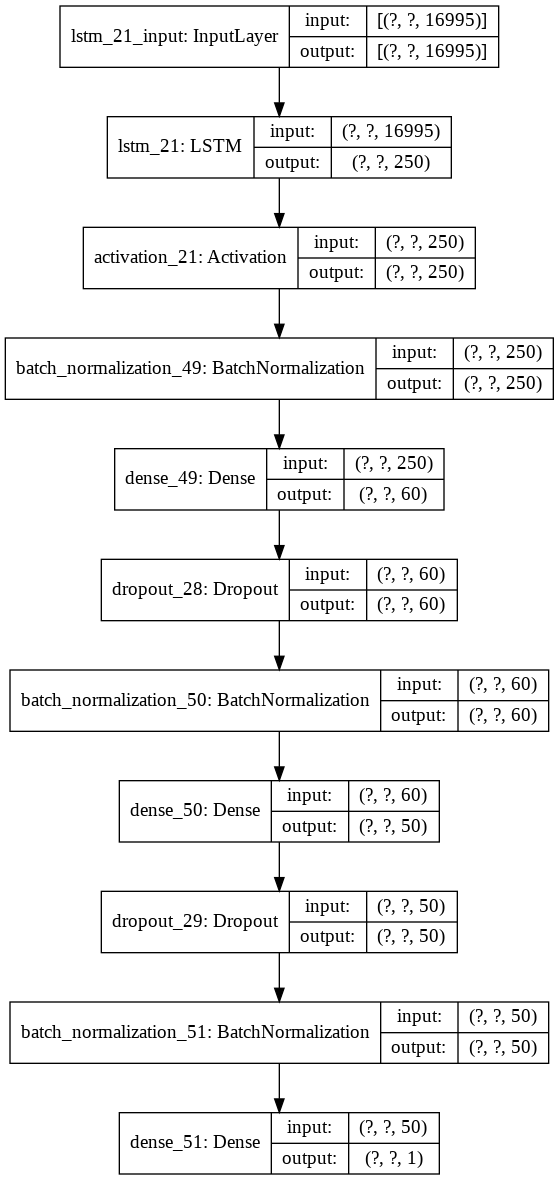

In [ ]:
keras.utils.plot_model(build_RNN(), show_shapes=True)

In [ ]:
checkpoint = ModelCheckpoint("Best_tfidf_RNN_model.h5",monitor='mean_absolute_error', patience=5,save_best_only=True,baseline=1)
callbacks = [ ReduceLROnPlateau(monitor='mean_absolute_error', patience=5),
              EarlyStopping(monitor='val_mean_absolute_error', min_delta=1, patience=5,mode='min'),checkpoint]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
history = build_RNN().fit(X_train, y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.3,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/100
15/15 [==============================] - 9s 585ms/step - loss: 68.1842 - mean_absolute_error: 68.1842 - val_loss: 36.0573 - val_mean_absolute_error: 36.0573
Epoch 2/100
15/15 [==============================] - 8s 555ms/step - loss: 27.7482 - mean_absolute_error: 27.7482 - val_loss: 39.0417 - val_mean_absolute_error: 39.0417
Epoch 3/100
15/15 [==============================] - 8s 557ms/step - loss: 22.3611 - mean_absolute_error: 22.3611 - val_loss: 25.7184 - val_mean_absolute_error: 25.7184
Epoch 4/100
15/15 [==============================] - 8s 554ms/step - loss: 20.4617 - mean_absolute_error: 20.4617 - val_loss: 27.2679 - val_mean_absolute_error: 27.2679
Epoch 5/100
15/15 [==============================] - 8s 556ms/step - loss: 19.1749 - mean_absolute_error: 19.1749 - val_loss: 25.7733 - val_mean_absolute_error: 25.7733
Epoch 6/100
15/15 [==============================] - 8s 563ms/step - loss: 18.0510 - mean_absolute_error: 18.0510 - val_loss: 26.1030 - val_mean_absolute_e

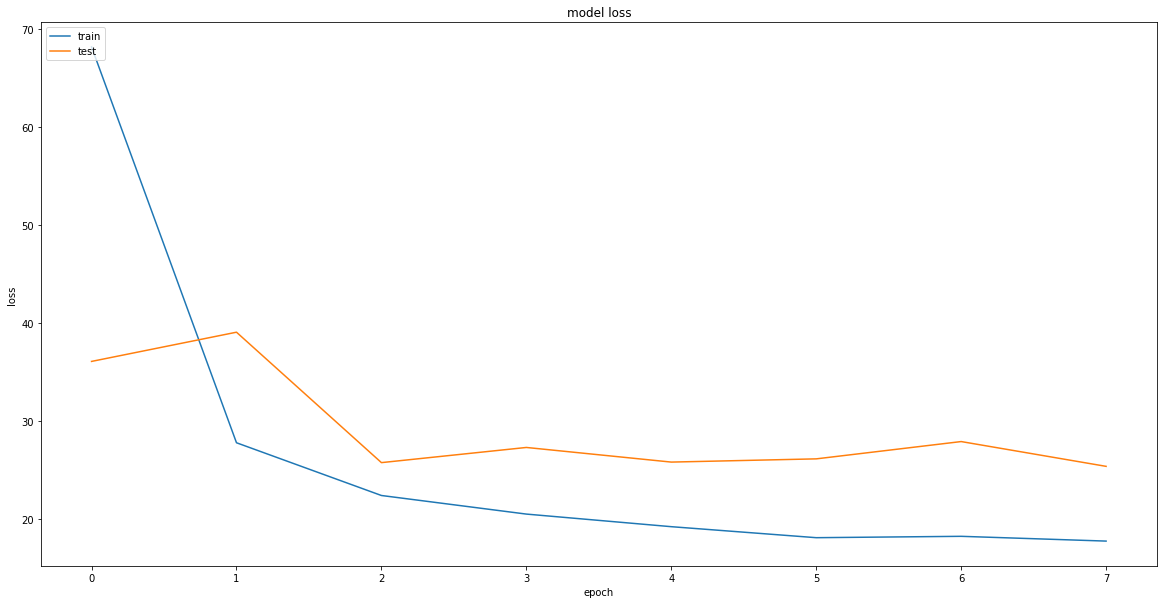

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model=models.load_model("Best_tfidf_RNN_model.h5")

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)

In [ ]:
score

[24.923242568969727, 24.923242568969727]

In [ ]:
S1="R&D Scientist"

S2='''Agilent inspires and supports discoveries that advance the quality of life. We provide life science, diagnostic and applied market laboratories worldwide with instruments, services, consumables, applications and expertise. Agilent enables customers to gain the answers and insights they seek - so they can do what they do best: improve the world around us. Information about Agilent is available at www.agilent.com.

You have honed your knowledge and technical skills and are looking to join a fast-paced, high-performance team developing products to improve the human condition.

We are seeking a highly motivated R&D Scientist to join our Genomics R&D organization at our Cedar Creek, TX location. This is a hands-on position supporting the microarray product line. In this position, you will generate data to support and improve existing products as well as help to bring new assays to market.

Primary Responsibilities:

Perform wet lab bench experiments as the primary responsibility, to maintain existing microarray products and develop new technologies for initial market launch
Analyze data from experiments, troubleshoot technical issues, and design new experiments to meet required technical specifications
Effectively communicate scientific results in both written format and orally at group and cross-functional team meetings.
Collaborate with product development teams across the Genomics organization, including colleagues at remote sites
Assist senior scientists with lab maintenance, supply, and organizational tasks to ensure compliance with regulatory and quality standards
Ability to drive main projects forward with limited, but appropriate, supervision, while also taking direction from senior scientists when needed to perform experiments and tasks needed to support the wider team
Assist in writing product specifications, test plans/reports, and life cycle documentation
Meticulously document experiments and verification/validation (V&V) studies in the Electronic Laboratory Notebook
Ensure all aspects of studies are conducted according to internal and external quality and regulatory requirements'''

In [ ]:
rsal=np.array([69,115])

In [ ]:
S1=clean(S1)
S2=clean(S2)

In [ ]:
S1=" ".join(S1)
S2=" ".join(S2)

In [ ]:
S=S1+": "+S2

In [ ]:
S=[S,S]

In [ ]:
S=vectorizer.transform(S)

In [ ]:
S

<2x16995 sparse matrix of type '<class 'numpy.float64'>'
	with 282 stored elements in Compressed Sparse Row format>

In [ ]:
S=S.toarray()
S=S.reshape(S.shape[0], 1, S.shape[1])

In [ ]:
S.shape

(2, 1, 16995)

In [ ]:
model=models.load_model("Best_tfidf_RNN_model.h5")

In [ ]:
sal=model.predict(S)

In [ ]:
sal=sal[0][0]

In [ ]:
print(sal)

[ 72.39302 118.76308]


In [ ]:
abs(sal-rsal)

array([3.39302063, 3.76307678])

In [ ]:
import gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
from gensim.utils import tokenize

In [ ]:
job_title=totdata["Job Title"]
job_desc=totdata["Job Description"]

In [ ]:
job_title=job_title.apply(lambda x:clean(x))
job_desc=job_desc.apply(lambda x:clean(x))
titles_desc=job_title+job_desc

In [ ]:
titles_desc=list(titles_desc)

In [ ]:
w2v_model = Word2Vec(min_count=10,
                     window=10,
                     size=300,
                     sg=1,
                     hs=1)
w2v_model.build_vocab(titles_desc)

In [ ]:
w2v_model.train(titles_desc, total_examples=len(titles_desc), epochs=80)

(142179286, 162952880)

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(titles_desc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(titles_desc, Y, test_size=0.1)

In [ ]:
x_train = pad_sequences(tokenizer.texts_to_sequences(X_train))
x_test = pad_sequences(tokenizer.texts_to_sequences(X_test))

In [ ]:
words=w2v_model.wv
vocab_size=vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

17022

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
      if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(17022, 300)


In [ ]:
def build_RNN_W2V(vocab_size,embedding_matrix):
  embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)
  model = Sequential()
  model.add(embedding_layer)
  model.add(LSTM(150, dropout=0.1, recurrent_dropout=0.1,return_sequences=True))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation(activations.relu))
  model.add(Dense(300, activation="relu"))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.2))
  model.add(Dense(100, activation="relu"))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.1))
  model.add(Dense(2, activation="relu"))
  ada = Adam(learning_rate=0.1)
  model.compile(optimizer= ada, loss="mean_absolute_error", metrics=['mean_absolute_error'])
  return model

In [ ]:
build_RNN_W2V(vocab_size,embedding_matrix).summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 300)          5106600   
_________________________________________________________________
lstm_27 (LSTM)               (None, 150)               270600    
_________________________________________________________________
batch_normalization_78 (Batc (None, 150)               600       
_________________________________________________________________
activation_26 (Activation)   (None, 150)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 300)               45300     
_________________________________________________________________
batch_normalization_79 (Batc (None, 300)               1200      
_________________________________________________________________
dropout_52 (Dropout)         (None, 300)             

In [ ]:
checkpoint = ModelCheckpoint("Best_tfidf_RNN_model.h5",monitor='mean_absolute_error', patience=7,save_best_only=True,baseline=10)
callbacks = [ ReduceLROnPlateau(monitor='mean_absolute_error', patience=7),
              EarlyStopping(monitor='val_mean_absolute_error', min_delta=1, patience=7,mode='min'),checkpoint]

In [ ]:
history = build_RNN().fit(x_train, y_train,
                    batch_size=30,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=callbacks)